<a href="https://colab.research.google.com/github/lomovtsevp/ML_course_MIREA/blob/main/ML2/PR4/Encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Архитектура кодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]          50,240
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------

Архитектура декодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 784]          50,960
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.19
Estimated Total Size (MB):

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Обучение автокодировщика..
Эпоха 1 / 10. Потери на последнем пакете: 0.0366726815700531
Эпоха 2 / 10. Потери на последнем пакете: 0.029098637402057648
Эпоха 3 / 10. Потери на последнем пакете: 0.025170473381876945
Эпоха 4 / 10. Потери на последнем пакете: 0.022925222292542458
Эпоха 5 / 10. Потери на последнем пакете: 0.022395038977265358
Эпоха 6 / 10. Потери на последнем пакете: 0.021498681977391243
Эпоха 7 / 10. Потери на последнем пакете: 0.019348736852407455
Эпоха 8 / 10. Потери на последнем пакете: 0.02101409249007702
Эпоха 9 / 10. Потери на последнем пакете: 0.02043352648615837
Эпоха 10 / 10. Потери на последнем пакете: 0.020769329741597176
Готово!


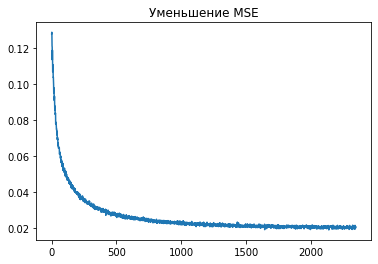

Проецирование скрытого пространства на плоскость..


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Готово!


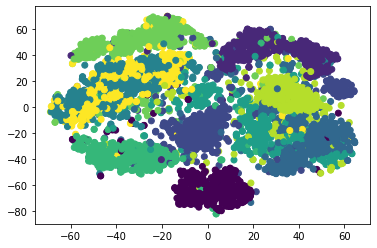

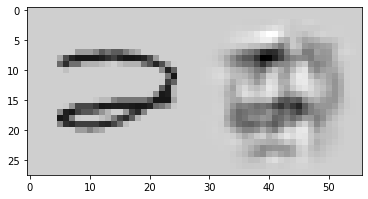

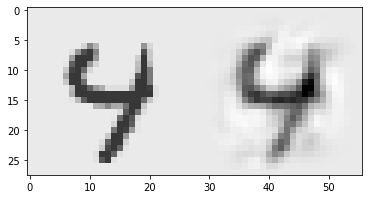

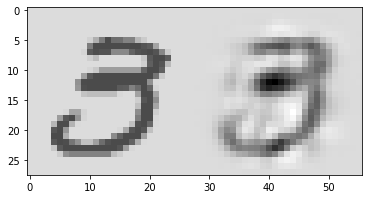

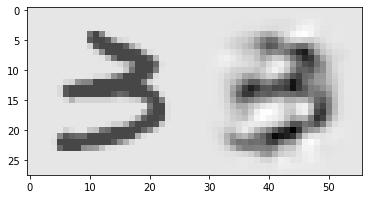

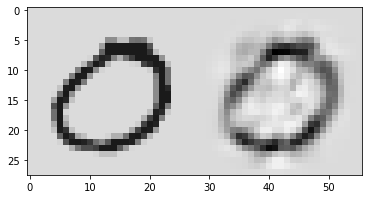

Расчет анимации..
Готово!


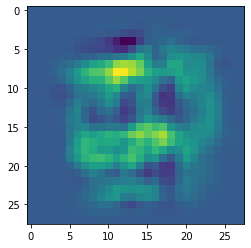

Обучение классификатора..
Эпоха 1 / 10. Потери на последнем пакете: 1.4570504426956177
Эпоха 2 / 10. Потери на последнем пакете: 1.1166728734970093
Эпоха 3 / 10. Потери на последнем пакете: 0.8479695320129395
Эпоха 4 / 10. Потери на последнем пакете: 0.6047360897064209
Эпоха 5 / 10. Потери на последнем пакете: 0.6187126636505127
Эпоха 6 / 10. Потери на последнем пакете: 0.5748333930969238
Эпоха 7 / 10. Потери на последнем пакете: 0.614683210849762
Эпоха 8 / 10. Потери на последнем пакете: 0.572298526763916
Эпоха 9 / 10. Потери на последнем пакете: 0.5500727295875549
Эпоха 10 / 10. Потери на последнем пакете: 0.5880517363548279
Готово!
Обучение классификатора..
Эпоха 1 / 10. Потери на последнем пакете: 2.223766326904297
Эпоха 2 / 10. Потери на последнем пакете: 2.1734626293182373
Эпоха 3 / 10. Потери на последнем пакете: 2.1145365238189697
Эпоха 4 / 10. Потери на последнем пакете: 2.034968614578247
Эпоха 5 / 10. Потери на последнем пакете: 1.967366337776184
Эпоха 6 / 10. Потери на после

In [1]:
import torch
import torch.nn as nn

import torch.optim as optim

from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader

from torchsummary import summary

from itertools import chain
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score


# В этой части лабораторной работы вам предстоит реализовать и обучить автокодировочную сеть на наборе данных MNIST.
# Сценарий выполнения кода:
# 1. Обучение автокодировщика.
# 2. Отображение проекции скрытого пространства на плоскость для визуальной оценки распределения данных в скрытом пространстве.
# 3. Интерполяция между несколькими точками в скрытом пространстве, декодирование промежуточных точек в исходное пространство
# и анимация результата.
# 4. Обучение простого классификатора на исходных данных (изображениях цифр) и на векторах в скрытом пространстве.
# 5. Проверка полученных классификаторов на тестовых данных.

class Encoder(nn.Module):
    # Класс кодивщика, необходимо реализовать.

    def __init__(self, inputs, latent_size):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.encoder = nn.Linear(inputs, latent_size)
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
      x = x.view(x.size(0), -1)
        # ============
      return self.encoder(x)


class Decoder(nn.Module):
    # Класс декодировщика, необходимо реализовать.

    def __init__(self, latent_size, outputs):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.decoder = nn.Linear(latent_size, outputs)
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ

        # ============
        return self.decoder(x)


class SimpleClassifier(nn.Module):
    # Класс простого классификатора.

    def __init__(self, inputs, outputs):
        super().__init__()
        self.fc = nn.Linear(inputs, outputs)

        self._inputs = inputs

    def forward(self, x):
        x = x.reshape(-1, self._inputs)
        x = self.fc(x)
        return x


class LatentSpaceDataset(Dataset):
    # Класс для преобразования изображений в вектора скрытого пространства.

    def __init__(self, orig_space_data_loader, encoder):
        super().__init__()
        self._data = list()
        for batch, target in orig_space_data_loader:
            latent_space_imgs = encoder(batch).detach()
            self._data.extend(zip(latent_space_imgs, target))

    def __len__(self):
        return len(self._data)

    def __getitem__(self, i):
        return self._data[i]


def train_ae(data_loader, encoder, decoder, epochs, lr):
    # Функция для обучения автокодировщика.
    # Принимает на вход загрузчик тренеровочных данных,
    # кодировщик, декодировщик, количество эпох для обучения и скорость обучения.

    encoder.train()
    decoder.train()


    print('Обучение автокодировщика..')

    loss_func = nn.MSELoss() # функция потерь, нужно выбрать.
    optimizer = torch.optim.Adam(decoder.parameters())  # оптимизатор, нужно выбрать.
    loss_history = list()
    for epoch in range(epochs):
        for i, (batch, _) in enumerate(data_loader):
            batch = batch.reshape(batch.shape[0], -1)
            optimizer.zero_grad()
            loss = loss_func(decoder(encoder(batch)), batch)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')

    print('Готово!')

    encoder.eval()
    decoder.eval()

    plt.title('Уменьшение MSE')
    plt.plot(loss_history)
    plt.show()


def train_classifier(data_loader, model, epochs, lr):
    # Функция для обучения классификатора.

    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    print('Обучение классификатора..')
    for epoch in range(epochs):
        for i, (batch, target) in enumerate(data_loader):
            optimizer.zero_grad()
            loss = loss_func(model(batch), target)
            loss.backward()
            optimizer.step()
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')
    print('Готово!')
    model.eval()


def test_classifier(data_loader, classifier):
    # Функция для тестирования классификатора.

    batch, target = next(iter(data_loader))
    print(accuracy_score(torch.argmax(classifier(batch), dim=1).detach().numpy(), target))


def lerp(v1, v2, t):
    # Функция для линейной интерполяции между двумя векторами.
    return v1 * (1 - t) + v2 * t


def get_frame(i, data):
    # Функция для анимации
    i = min(i, len(data) - 1)
    ax.clear()
    ax.imshow(data[i])


LATENT_SIZE = 64  # размерность скрытого пространства, можно варьировать.

BATCH_SIZE = 256
EPOCHS = 10
LEARNING_RATE = 1e-4

ANIMATION_IMAGES = 5
ANIMATION_N_FRAMES = (ANIMATION_IMAGES - 1) * 20
ANIMATION_INTERVAL = 50

encoder = Encoder(28 * 28, LATENT_SIZE)
decoder = Decoder(LATENT_SIZE,  28 * 28)

print('Архитектура кодировщика: ')
summary(encoder, [[28 * 28]])
print()
print('Архитектура декодировщика: ')
summary(decoder, [[LATENT_SIZE]])

train_data = MNIST('data', train=True, download=True, transform=ToTensor())
test_data = MNIST('data', train=False, download=True, transform=ToTensor())
train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

train_ae(train_data_loader, encoder, decoder, EPOCHS, LEARNING_RATE)

test_imgs = list()
for batch, target in train_data_loader:
    test_imgs.extend(zip(batch, target))
    if len(test_imgs) > 5000:
        break
imgs_list, targets = zip(*test_imgs)
imgs = torch.stack(imgs_list)

print('Проецирование скрытого пространства на плоскость..')
tsne = TSNE()
latent_imgs_emb = [encoder(img.unsqueeze(0))[0].detach().numpy() for img in imgs]
latent_imgs_emb = tsne.fit_transform(np.array(latent_imgs_emb))
x, y = zip(*latent_imgs_emb)
plt.scatter(x, y, c=targets)
print('Готово!')
plt.show()

latent_imgs = encoder(imgs)
restored_imgs = decoder(latent_imgs)

restored_imgs = restored_imgs.reshape(-1, 1, 28, 28)

for i in range(5):
    orig_restored = torch.hstack((imgs[i][0], restored_imgs[i][0].detach()))
    plt.imshow(orig_restored.numpy(), cmap='Greys')
    plt.show()

print('Расчет анимации..')
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
animation_data = list()
for i in range(4 * 20):
    frames_per_conn = ANIMATION_N_FRAMES // (ANIMATION_IMAGES - 1)
    vec_index = i // frames_per_conn
    t = i % frames_per_conn / frames_per_conn
    interp_vec = lerp(latent_imgs[vec_index], latent_imgs[vec_index + 1], t)
    restored_img = decoder(interp_vec)
    restored_img = restored_img.reshape(-1, 1, 28, 28)
    animation_data.append(restored_img[0][0].detach().numpy())
print('Готово!')

animation = FuncAnimation(figure, get_frame, frames=ANIMATION_N_FRAMES, interval=ANIMATION_INTERVAL, fargs=(animation_data,))
plt.show()

x_classifier = SimpleClassifier(28 * 28, 10)
train_classifier(train_data_loader, x_classifier, epochs=10, lr=1e-4)

latent_space_train_data_loader = DataLoader(LatentSpaceDataset(train_data_loader, encoder), batch_size=BATCH_SIZE, shuffle=True)

z_classifier = SimpleClassifier(LATENT_SIZE, 10)
train_classifier(latent_space_train_data_loader, z_classifier, epochs=10, lr=1e-4)

orig_test_data_loader = DataLoader(test_data, batch_size=1024, shuffle=True)
latent_test_data_loader = DataLoader(LatentSpaceDataset(orig_test_data_loader, encoder), batch_size=1024, shuffle=True)

test_classifier(orig_test_data_loader, x_classifier)
test_classifier(latent_test_data_loader, z_classifier)

Архитектура кодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------

Архитектура декодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
--------------

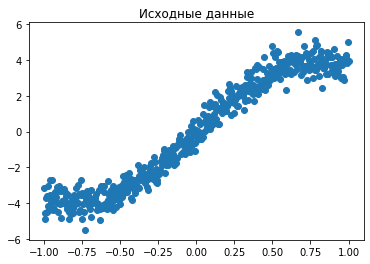

Эпоха 1 / 500. Потери на последнем пакете: 7.508081912994385
Эпоха 2 / 500. Потери на последнем пакете: 6.560067176818848
Эпоха 3 / 500. Потери на последнем пакете: 7.650129318237305
Эпоха 4 / 500. Потери на последнем пакете: 5.97898006439209
Эпоха 5 / 500. Потери на последнем пакете: 6.905353546142578
Эпоха 6 / 500. Потери на последнем пакете: 8.056188583374023
Эпоха 7 / 500. Потери на последнем пакете: 7.28564453125
Эпоха 8 / 500. Потери на последнем пакете: 8.060766220092773
Эпоха 9 / 500. Потери на последнем пакете: 6.727837085723877
Эпоха 10 / 500. Потери на последнем пакете: 6.374146461486816
Эпоха 11 / 500. Потери на последнем пакете: 5.656468868255615
Эпоха 12 / 500. Потери на последнем пакете: 5.214767932891846
Эпоха 13 / 500. Потери на последнем пакете: 5.106722354888916
Эпоха 14 / 500. Потери на последнем пакете: 6.264749526977539
Эпоха 15 / 500. Потери на последнем пакете: 5.547037601470947
Эпоха 16 / 500. Потери на последнем пакете: 6.167753219604492
Эпоха 17 / 500. Потери

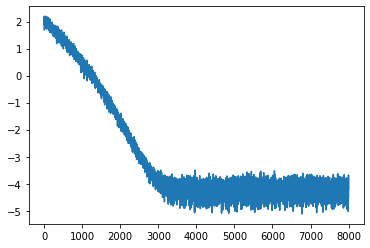

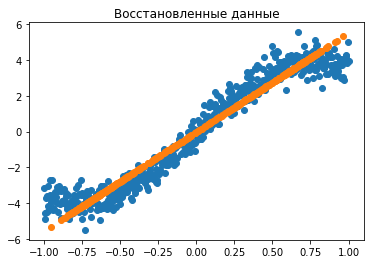

In [34]:
import torch
import torch.nn as nn

import torch.optim as optim
from itertools import chain

from torch.utils.data import DataLoader

from torchsummary import summary
from matplotlib import pyplot as plt


# В данной лабораторной работе вам предстоит реализовать и обучить автокодировочную нейронную сеть.
# В этой части в качесте данных для обучения представляются сгенерированные точки на плоскости.
# Цель в том, чтобы получить интуитивное понимание того, как автокодировщик параметризует многообразие,
# в окрестности которого располагаются точки в исходном признаковом пространстве.
# Для этого данные сначала проебразуются обученным кодировщиком, а затем докодируются обратно в исходное пространство.
# В итоге все точки лежат на параметризуемом многообразии (в данном случае, некоторой кривой на плоскости).

class Encoder(nn.Module):
    # Класс кодировщика, необходимо реализовать.

    def __init__(self, inputs, latent_size):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(inputs, latent_size))

        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        # ============
        return self.encoder(x)


class Decoder(nn.Module):
    # Класс декодировщика, необходимо реализовать.

    def __init__(self, latent_size, outputs):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.decoder = nn.Sequential(nn.Linear(latent_size, outputs))
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        
        # ============
        return self.decoder(x)


def train_ae(data_loader, encoder, decoder, epochs, lr):
    # Функция для обучения автокодировщика.
    # Принимает на вход загрузчик тренеровочных данных,
    # кодировщик, декодировщик, количество эпох для обучения и скорость обучения.

    encoder.train()
    decoder.train()

    loss_history = list()

    loss_func = nn.MSELoss() # функция потерь, нужно выбрать.
    optimizer = torch.optim.Adam(decoder.parameters())  # оптимизатор, нужно выбрать.

    for epoch in range(epochs):
        for i, (batch, _) in enumerate(data_loader):
            # ВАШ КОД ЗДЕСЬ
            batch = batch.reshape(batch.shape[0], -1)
            optimizer.zero_grad()
            loss = loss_func(decoder(encoder(batch)), batch)  # потери на пакете, нужно вычислить.
            loss.backward()
            optimizer.step()
            # ============
            loss_history.append(loss.log().item())
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')

    encoder.eval()
    decoder.eval()

    plt.plot(loss_history)
    plt.show()


# Создаем кодировщик и декодировщик
encoder = Encoder(2, 1)
decoder = Decoder(1, 2)

print('Архитектура кодировщика: ')
summary(encoder, [[2]])
print()
print('Архитектура декодировщика: ')
summary(decoder, [[1]])


# Генерируем данные
x = torch.linspace(-1, 1, steps=512)
y = 4 * torch.sin(2 * x) + torch.randn(512) / 2

plt.title('Исходные данные')
plt.scatter(x, y)
plt.show()

# Готовим обучающие данные
train_data = torch.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
train_data_loader = DataLoader(list(zip(train_data, [torch.tensor(0)] * train_data.shape[0])), batch_size=32, shuffle=True)

# Обучаем автокодировщик
train_ae(train_data_loader, encoder, decoder, 500, 5e-5)

# Прогоняем данные через автокодировщик
restored_data = decoder(encoder(train_data))

# Отображаем результат
plt.title('Восстановленные данные')
plt.scatter(x, y)
plt.scatter(*zip(*restored_data.detach().numpy()))
plt.show()